Myllee Sarleth Mosquera Rivas

Modelo basado en lógica difusa para la estimación de Indices de caminabilidad en función de percepciones peatonales en cuanto a factores ambientales, sociales y de infraestructura

In [25]:
#Instalación de la librería Scikit-Fuzzy
pip install -U scikit-fuzzy

In [26]:
#Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control

In [27]:
#Definición del universo de las variables del modelo

Densidad_Poblacional = np.arange(1,5.001, 0.001)
Densidad_Intersecciones = np.arange(1,5.001, 0.001)
Usos_Suelo = np.arange(1,5.001, 0.001)
Seguridad = np.arange(1,5.001, 0.001)
Vegetación =np.arange(1,5.001, 0.001)
Diversidad = np.arange(1,5.001, 0.001)
Señalizacion = np.arange(1,5.001, 0.001)
Pendiente = np.arange(1,5.001, 0.001)
Aceras = np.arange(1,5.001, 0.001)
Indice = np.arange(0,1.001,0.001)

Funciones de pertenencia y categorías linguisticas

In [28]:


#fuzzy membership functions - Densidad_Poblacional
DP_Low = 1 - fuzz.smf (Densidad_Poblacional,1.5,3)
DP_md = fuzz.gaussmf(Densidad_Poblacional,3,0.3)
DP_hi = fuzz.smf(Densidad_Poblacional,3,4.5)

#Fuzzy Membership Functions - Densidad_Intersecciones

DI_low = DP_Low
DI_md = DP_md
DI_hi = DP_hi

#Fuzzy Membership Functions - Usos_Suelo
US_low =DP_Low
US_md = DP_md
US_hi = DP_hi

#Fuzzy Membership Functions - Seguridad
S_Low = DP_Low
S_Moderate = DP_md
S_High = DP_hi

#Fuzzy Membership Functions - Vegetación
V_Low = DP_Low
V_Moderate = DP_md
V_High =DP_hi

#Fuzzy Membership Functions - Diversidad
D_Cold = DP_Low
D_Moderate = DP_md
D_hot = DP_hi

#Fuzzy Membership Functions - Señalizacion
SÑ_Weak =DP_Low
SÑ_Moderate = DP_md
SÑ_High = DP_hi

#Fuzzy Membership Functions - Pendiente
P_WeakA = DP_Low
P_ModerateA =DP_md
P_HighA = DP_hi

#Fuzzy Membership Functions - Aceras

A_Low = DP_Low
A_Moderate = DP_md
A_High = DP_hi

#Fuzzy Membership Functions - INDICE DE CAMINABILIDAD

#IC_Low = 1 - fuzz.smf(Indice,0.1,0.5)
#IC_Moderate = fuzz.gaussmf(Indice,0.5,0.1)
#IC_High = fuzz.smf(Indice,0.5,0.9)


IC_Very_Low = 1 - fuzz.smf(Indice,0.08,0.2)
IC_Low = fuzz.gaussmf(Indice,0.25,0.07)
IC_Moderate = fuzz.gaussmf(Indice,0.5,0.07)
IC_High = fuzz.gaussmf(Indice,0.75,0.07)
IC_Very_High = fuzz.smf(Indice,0.8,0.92)

Definición de las variables como antecedentes

In [29]:
DP = control.Antecedent(Densidad_Poblacional, 'DP')
DI = control.Antecedent(Densidad_Intersecciones, 'DI')
US = control.Antecedent(Usos_Suelo, 'US')
S = control.Antecedent(Seguridad, 'S')
V = control.Antecedent(Vegetación, 'V')
D = control.Antecedent(Diversidad, 'D')
SÑ = control.Antecedent(Señalizacion, 'SÑ')
P = control.Antecedent(Pendiente, 'P')
A = control.Antecedent(Aceras, 'A')


#Options for defuzzification method: 'bisector', 'centroid', and 'mom'
defuzzification_method = 'bisector'
IC = control.Consequent(Indice, 'IC', defuzzify_method=defuzzification_method)

Asignación de las funciones de pertenencia a las categorías linguisticas

In [30]:

DP["Neutra"] = DP_md
DP["Mala"] = DP_Low
DP["Buena"] = DP_hi


DI["Neutra"] = DI_md
DI["Mala"] = DI_low
DI["Buena"] = DI_hi


US["Mala"] = US_low
US["Neutra"] = US_md
US["Buena"] = US_hi

S["Mala"] = S_Low
S["Neutra"] = S_Moderate
S["Buena"] = S_High

V["Mala"] = V_Low
V["Neutra"] = V_Moderate
V["Buena"] = V_High

D["Mala"] = D_Cold
D["Neutra"] =D_Moderate
D["Buena"] = D_hot

SÑ["Mala"] = SÑ_Weak
SÑ["Neutra"] = SÑ_Moderate
SÑ["Buena"] = SÑ_High

P["Mala"] = P_WeakA
P["Neutra"] = P_ModerateA
P["Buena"] = P_HighA

A["Mala"] = A_Low
A["Neutra"] = A_Moderate
A["Buena"] = A_High


IC["Muy Bajo"] = IC_Very_Low
IC["Bajo"] = IC_Low
IC["Medio"] = IC_Moderate
IC["Alto"] = IC_High
IC["Muy alto"] = IC_Very_High

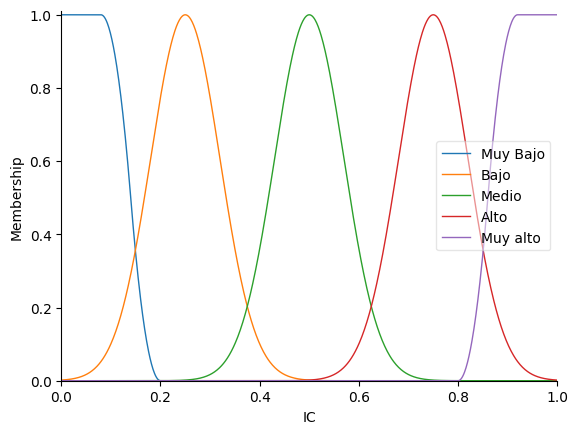

In [31]:
IC.view()

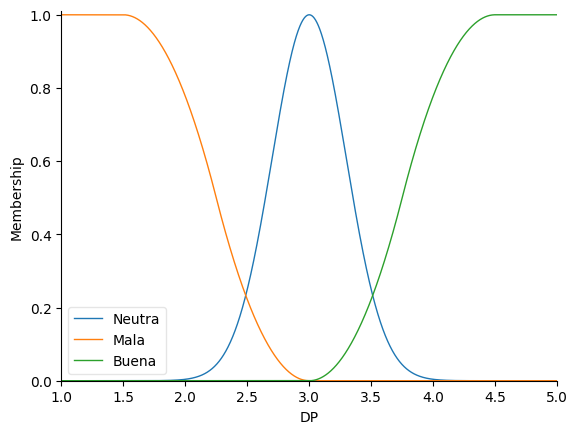

In [32]:
DP.view()

Normas - Operadores Linguisticos

In [39]:
#Las normas t corresponden a los operadores linguisticos para las conexiones "Y", mientras que las normas S corresponden a las "O"

def t_norm1(a, b):
    return np.minimum(a, b)

def t_norm2(a, b):
    return np.multiply(a, b)

def s_norm1(a, b):
    return np.maximum(a, b)


T_norm = t_norm1
S_norm = s_norm1

Abreviaturas

* DP: Densidad Poblacional
* DI: Densidad Intersecciones
* US: Usos del suelo
* S: Seguridad
* V: Vegetación
* D: Diversidad
* SÑ: Señalización
* P: Pendiente
* A: Aceras
* IC: Índice de caminabilidad











Definición de la base de reglas lógicas

In [36]:
R1 = control.Rule(antecedent= ((DP["Mala"] | DP["Neutra"] | DP["Buena"]) & DI["Mala"] & US["Mala"] & S["Mala"] & V["Mala"] & D["Mala"] & SÑ["Mala"] & P["Mala"] & A["Mala"]), consequent = IC["Muy Bajo"], and_func=T_norm , or_func= S_norm)
R2 = control.Rule(antecedent= (DP["Mala"] & (DI["Mala"] | DI["Neutra"] | DI["Buena"]) & US["Mala"] & S["Mala"] & V["Mala"] & D["Mala"] & SÑ["Mala"] & P["Mala"] & A["Mala"]), consequent = IC["Muy Bajo"], and_func=T_norm , or_func= S_norm)
R3 = control.Rule(antecedent= (DP["Mala"] & DI["Mala"] & (US["Mala"] | US["Buena"] | US["Neutra"]) & S["Mala"] & V["Mala"] & D["Mala"] & SÑ["Mala"] & P["Mala"] & A["Mala"]), consequent = IC["Muy Bajo"], and_func=T_norm , or_func= S_norm)
R4 = control.Rule(antecedent= (DP["Mala"] & DI["Mala"] & US["Mala"] & (S["Mala"] | S["Buena"] | S["Neutra"]) & V["Mala"] & D["Mala"] & SÑ["Mala"] & P["Mala"] & A["Mala"]), consequent = IC["Muy Bajo"], and_func=T_norm , or_func= S_norm)
R5 = control.Rule(antecedent= (DP["Mala"] & DI["Mala"] & US["Mala"] & S["Mala"]  & (V["Mala"] | V["Buena"] | V["Neutra"]) & D["Mala"] & SÑ["Mala"] & P["Mala"] & A["Mala"]), consequent = IC["Muy Bajo"], and_func=T_norm , or_func= S_norm)
R6 = control.Rule(antecedent= (DP["Mala"] & DI["Mala"] & US["Mala"] & S["Mala"] & V["Mala"] & (D["Mala"] | D["Neutra"] | D["Buena"]) & SÑ["Mala"] & P["Mala"] & A["Mala"]), consequent = IC["Muy Bajo"], and_func=T_norm , or_func= S_norm)
R7 = control.Rule(antecedent= (DP["Mala"] & DI["Mala"] & US["Mala"] & S["Mala"] & V["Mala"] & D["Mala"] & (SÑ["Mala"] | SÑ["Buena"] | SÑ["Neutra"]) & P["Mala"] & A["Mala"]), consequent = IC["Muy Bajo"], and_func=T_norm , or_func= S_norm)
R8 = control.Rule(antecedent= (DP["Mala"] & DI["Mala"] & US["Mala"] & S["Mala"] & V["Mala"] & D["Mala"] & SÑ["Mala"]  & (P["Mala"] | P["Neutra"] | P["Buena"]) & A["Mala"]), consequent = IC["Muy Bajo"], and_func=T_norm , or_func= S_norm)
R9 = control.Rule(antecedent= (DP["Mala"] & DI["Mala"] & US["Mala"] & S["Mala"] & V["Mala"] & D["Mala"] & SÑ["Mala"]  & P["Mala"] & (A["Mala"] | A["Buena"] | A["Neutra"])), consequent = IC["Muy Bajo"], and_func=T_norm , or_func= S_norm)

R10 = control.Rule(antecedent= (DP["Buena"] & DI["Buena"] & US["Mala"] & S["Mala"] & V["Mala"] & D["Mala"] & SÑ["Mala"]  & P["Mala"] & A["Mala"]), consequent = IC["Bajo"], and_func=T_norm , or_func= S_norm)
R11 = control.Rule(antecedent= (DP["Buena"] & DI["Buena"] & US["Buena"] & S["Mala"] & V["Mala"] & D["Mala"] & SÑ["Mala"]  & P["Mala"] & A["Mala"]), consequent = IC["Bajo"], and_func=T_norm , or_func= S_norm)
R12 = control.Rule(antecedent= (DP["Buena"] & DI["Buena"] & US["Buena"] & S["Buena"] & V["Mala"] & D["Mala"] & SÑ["Mala"]  & P["Mala"] & A["Mala"]), consequent = IC["Bajo"], and_func=T_norm , or_func= S_norm)
R13 = control.Rule(antecedent= (DP["Buena"] & DI["Buena"] & US["Buena"] & S["Buena"] & V["Buena"] & D["Mala"] & SÑ["Mala"]  & P["Mala"] & A["Mala"]), consequent = IC["Medio"], and_func=T_norm , or_func= S_norm)
R14 = control.Rule(antecedent= (DP["Buena"] & DI["Buena"] & US["Buena"] & S["Buena"] & V["Buena"] & D["Buena"] & SÑ["Mala"]  & P["Mala"] & A["Mala"]), consequent = IC["Alto"], and_func=T_norm , or_func= S_norm)
R15 = control.Rule(antecedent= (DP["Buena"] & DI["Buena"] & US["Buena"] & S["Buena"] & V["Buena"] & D["Buena"] & SÑ["Buena"]  & P["Mala"] & A["Mala"]), consequent = IC["Alto"], and_func=T_norm , or_func= S_norm)
R16 = control.Rule(antecedent= (DP["Buena"] & DI["Buena"] & US["Buena"] & S["Buena"] & V["Buena"] & D["Buena"] & SÑ["Buena"]  & P["Buena"] & A["Mala"]), consequent = IC["Muy alto"], and_func=T_norm , or_func= S_norm)
R17 = control.Rule(antecedent= (DP["Buena"] & DI["Buena"] & US["Buena"] & S["Buena"] & V["Buena"] & D["Buena"] & SÑ["Buena"]  & P["Buena"] & A["Buena"]), consequent = IC["Muy alto"], and_func=T_norm , or_func= S_norm)

R18 = control.Rule(antecedent= (DP["Mala"] & DI["Buena"] & US["Buena"] & S["Buena"] & V["Buena"] & D["Buena"] & SÑ["Buena"]  & P["Buena"] & A["Buena"]), consequent = IC["Muy alto"], and_func=T_norm , or_func= S_norm)
R19 = control.Rule(antecedent= (DP["Mala"] & DI["Mala"] & US["Buena"] & S["Buena"] & V["Buena"] & D["Buena"] & SÑ["Buena"]  & P["Buena"] & A["Buena"]), consequent = IC["Muy alto"], and_func=T_norm , or_func= S_norm)
R20 = control.Rule(antecedent= (DP["Mala"] & DI["Mala"] & US["Mala"] & S["Buena"] & V["Buena"] & D["Buena"] & SÑ["Buena"]  & P["Buena"] & A["Buena"]), consequent = IC["Muy alto"], and_func=T_norm , or_func= S_norm)
R21 = control.Rule(antecedent= (DP["Mala"] & DI["Mala"] & US["Mala"] & S["Mala"] & V["Buena"] & D["Buena"] & SÑ["Buena"]  & P["Buena"] & A["Buena"]), consequent = IC["Medio"], and_func=T_norm , or_func= S_norm)
R22 = control.Rule(antecedent= (DP["Mala"] & DI["Mala"] & US["Mala"] & S["Mala"] & V["Mala"] & D["Buena"] & SÑ["Buena"]  & P["Buena"] & A["Buena"]), consequent = IC["Muy Bajo"], and_func=T_norm , or_func= S_norm)
R23 = control.Rule(antecedent= (DP["Mala"] & DI["Mala"] & US["Mala"] & S["Mala"] & V["Mala"] & D["Mala"] & SÑ["Buena"]  & P["Buena"] & A["Buena"]), consequent = IC["Muy Bajo"], and_func=T_norm , or_func= S_norm)
R24 = control.Rule(antecedent= (DP["Mala"] & DI["Mala"] & US["Mala"] & S["Mala"] & V["Mala"] & D["Mala"] & SÑ["Mala"]  & P["Buena"] & A["Buena"]), consequent = IC["Muy Bajo"], and_func=T_norm , or_func= S_norm)
R25 = control.Rule(antecedent= (DP["Buena"] & DI["Buena"] & US["Buena"] & S["Buena"] & V["Buena"] & D["Mala"] & SÑ["Mala"]  & P["Buena"] & A["Mala"]), consequent = IC["Alto"], and_func=T_norm , or_func= S_norm)
R26 = control.Rule(antecedent= (DP["Buena"] & DI["Buena"] & US["Buena"] & S["Buena"] & (V["Mala"] | D["Mala"] | SÑ["Mala"])  & P["Buena"] & A["Buena"]), consequent = IC["Alto"], and_func=T_norm , or_func= S_norm)
R27 = control.Rule(antecedent= (DP["Buena"] & DI["Buena"] & US["Buena"] & S["Buena"] & (V["Neutra"] | D["Neutra"] | SÑ["Neutra"])  & P["Buena"] & A["Buena"]), consequent = IC["Alto"], and_func=T_norm , or_func= S_norm)
R28 = control.Rule(antecedent= (DP["Buena"] & DI["Buena"] & US["Buena"] & S["Buena"] & V["Buena"] & D["Buena"] & SÑ["Buena"]  & (P["Neutra"] | A["Neutra"])), consequent = IC["Muy alto"], and_func=T_norm , or_func= S_norm)

R29 = control.Rule(antecedent= (DP["Neutra"] & DI["Buena"] & US["Buena"] & S["Buena"] & V["Buena"] & D["Buena"] & SÑ["Buena"]  & (P["Neutra"] | A["Neutra"])), consequent = IC["Muy alto"], and_func=T_norm , or_func= S_norm)
R30 = control.Rule(antecedent= (DP["Neutra"] & DI["Buena"] & (US["Neutra"] & S["Neutra"]) & V["Buena"] & D["Buena"] & SÑ["Buena"]  & P["Buena"] & A["Buena"]), consequent = IC["Muy alto"], and_func=T_norm , or_func= S_norm)
R31 = control.Rule(antecedent= (DP["Neutra"] & DI["Neutra"] & US["Neutra"] & S["Neutra"] & V["Neutra"] & D["Neutra"] & SÑ["Neutra"]  & P["Neutra"] & A["Neutra"]), consequent = IC["Medio"], and_func=T_norm , or_func= S_norm)
R32 = control.Rule(antecedent= (DP["Buena"] & DI["Neutra"] & US["Neutra"] & S["Neutra"] & V["Neutra"] & D["Neutra"] & SÑ["Neutra"]  & P["Neutra"] & A["Neutra"]), consequent = IC["Medio"], and_func=T_norm , or_func= S_norm)
R33 = control.Rule(antecedent= (DP["Buena"] & DI["Buena"] & US["Neutra"] & S["Neutra"] & V["Neutra"] & D["Neutra"] & SÑ["Neutra"]  & P["Neutra"] & A["Neutra"]), consequent = IC["Medio"], and_func=T_norm , or_func= S_norm)
R34 = control.Rule(antecedent= (DP["Buena"] & DI["Buena"] & US["Buena"] & S["Neutra"] & V["Neutra"] & D["Neutra"] & SÑ["Neutra"]  & P["Neutra"] & A["Neutra"]), consequent = IC["Medio"], and_func=T_norm , or_func= S_norm)
R35 = control.Rule(antecedent= (DP["Buena"] & DI["Buena"] & US["Buena"] & S["Buena"] & V["Neutra"] & D["Neutra"] & SÑ["Neutra"]  & P["Neutra"] & A["Neutra"]), consequent = IC["Medio"], and_func=T_norm , or_func= S_norm)
R36 = control.Rule(antecedent= (DP["Buena"] & DI["Buena"] & US["Buena"] & S["Buena"] & V["Buena"] & D["Neutra"] & SÑ["Neutra"]  & P["Neutra"] & A["Neutra"]), consequent = IC["Alto"], and_func=T_norm , or_func= S_norm)
R37 = control.Rule(antecedent= (DP["Buena"] & DI["Buena"] & US["Buena"] & S["Buena"] & V["Buena"] & D["Buena"] & SÑ["Neutra"]  & P["Neutra"] & A["Neutra"]), consequent = IC["Muy alto"], and_func=T_norm , or_func= S_norm)
R38 = control.Rule(antecedent= (DP["Buena"] & DI["Buena"] & US["Buena"] & S["Buena"] & V["Buena"] & D["Buena"] & SÑ["Buena"]  & P["Neutra"] & A["Neutra"]), consequent = IC["Muy alto"], and_func=T_norm , or_func= S_norm)
R39 = control.Rule(antecedent= (DP["Buena"] & DI["Buena"] & US["Buena"] & S["Buena"] & V["Buena"] & D["Buena"] & SÑ["Buena"]  & P["Neutra"] & A["Neutra"]), consequent = IC["Muy alto"], and_func=T_norm , or_func= S_norm)

R40 = control.Rule(antecedent= (DP["Buena"] & DI["Buena"] & US["Mala"] & S["Neutra"] & V["Buena"] & D["Mala"] & SÑ["Neutra"]  & P["Neutra"] & A["Mala"]), consequent = IC["Medio"], and_func=T_norm , or_func= S_norm)
R41 = control.Rule(antecedent= (DP["Neutra"] & DI["Buena"] & US["Mala"] & S["Neutra"] & V["Buena"] & D["Mala"] & SÑ["Neutra"]  & P["Neutra"] & A["Mala"]), consequent = IC["Medio"], and_func=T_norm , or_func= S_norm)
R42 = control.Rule(antecedent= (DP["Neutra"] & DI["Neutra"] & US["Mala"] & S["Neutra"] & V["Mala"] & D["Mala"] & SÑ["Neutra"]  & P["Neutra"] & A["Mala"]), consequent = IC["Bajo"], and_func=T_norm , or_func= S_norm)
R43 = control.Rule(antecedent= (DP["Neutra"] & DI["Mala"] & US["Mala"] & S["Neutra"] & V["Mala"] & D["Buena"] & SÑ["Neutra"]  & P["Mala"] & A["Mala"]), consequent = IC["Muy Bajo"], and_func=T_norm , or_func= S_norm)
R44 = control.Rule(antecedent= (DP["Neutra"] & DI["Neutra"] & US["Mala"] & S["Mala"] & V["Mala"] & D["Buena"] & SÑ["Buena"]  & P["Buena"] & A["Mala"]), consequent = IC["Medio"], and_func=T_norm , or_func= S_norm)
R45 = control.Rule(antecedent=(DP["Neutra"] & DI["Neutra"] & US["Buena"] & S["Buena"] & V["Mala"] & D["Buena"] & SÑ["Mala"] & P["Neutra"] & A["Neutra"]), consequent=IC["Medio"], and_func=T_norm, or_func=S_norm)
R46 = control.Rule(antecedent= (DP["Buena"] & DI["Buena"] & (US["Mala"] | V["Mala"] |SÑ["Mala"]) & S["Buena"] & D["Buena"] & P["Buena"] & A["Buena"]), consequent = IC["Alto"], and_func=T_norm , or_func= S_norm)

R47 = control.Rule(antecedent= ((DP["Neutra"] | DP["Mala"] | DP["Buena"]) & DI["Neutra"] & US["Neutra"] & S["Neutra"] & V["Neutra"] & D["Neutra"] & SÑ["Neutra"] & P["Neutra"] & A["Neutra"]), consequent = IC["Medio"], and_func=T_norm , or_func= S_norm)
R48 = control.Rule(antecedent= (DP["Neutra"] & (DI["Neutra"] | DI["Buena"] | DI["Mala"]) & US["Neutra"] & S["Neutra"] & V["Neutra"] & D["Neutra"] & SÑ["Neutra"] & P["Neutra"] & A["Neutra"]), consequent = IC["Medio"], and_func=T_norm , or_func= S_norm)
R49 = control.Rule(antecedent= (DP["Neutra"] & DI["Neutra"]  & (US["Neutra"] | US["Buena"] | US["Mala"]) & S["Neutra"] & V["Neutra"] & D["Neutra"] & SÑ["Neutra"] & P["Neutra"] & A["Neutra"]), consequent = IC["Medio"], and_func=T_norm , or_func= S_norm)
R50 = control.Rule(antecedent= (DP["Neutra"] & DI["Neutra"] & US["Neutra"] & (S["Neutra"] | S["Mala"] | S["Buena"] ) & V["Neutra"] & D["Neutra"] & SÑ["Neutra"] & P["Neutra"] & A["Neutra"]), consequent = IC["Medio"], and_func=T_norm , or_func= S_norm)
R51 = control.Rule(antecedent= (DP["Neutra"] & DI["Neutra"] & US["Neutra"] & S["Neutra"] & (V["Neutra"] | V["Buena"] | V["Mala"]) & D["Neutra"] & SÑ["Neutra"] & P["Neutra"] & A["Neutra"]), consequent = IC["Medio"], and_func=T_norm , or_func= S_norm)
R52 = control.Rule(antecedent= (DP["Neutra"] & DI["Neutra"] & US["Neutra"] & S["Neutra"] & V["Neutra"] & (D["Neutra"] | D["Buena"] | D["Mala"]) & SÑ["Neutra"] & P["Neutra"] & A["Neutra"]), consequent = IC["Medio"], and_func=T_norm , or_func= S_norm)
R53 = control.Rule(antecedent= (DP["Neutra"] & DI["Neutra"] & US["Neutra"] & S["Neutra"] & V["Neutra"] & D["Neutra"] & (SÑ["Neutra"] | SÑ["Buena"] | SÑ["Mala"]) & P["Neutra"] & A["Neutra"]), consequent = IC["Medio"], and_func=T_norm , or_func= S_norm)
R54 = control.Rule(antecedent= (DP["Neutra"] & DI["Neutra"] & US["Neutra"] & S["Neutra"] & V["Neutra"] & D["Neutra"] & SÑ["Neutra"] & (P["Neutra"] | P["Mala"] | P["Buena"]) & A["Neutra"]), consequent = IC["Medio"], and_func=T_norm , or_func= S_norm)


R55= control.Rule(antecedent= (DP["Buena"] & DI["Buena"] & US["Neutra"] &  S["Buena"] &   V["Neutra"] & D["Buena"] &  SÑ["Buena"] & P["Buena"]  & A["Buena"]), consequent = IC["Alto"], and_func=T_norm , or_func= S_norm)
R56= control.Rule(antecedent= (DP["Buena"] & DI["Neutra"] & US["Buena"] &  S["Mala"] &   V["Buena"] & D["Buena"] &  SÑ["Neutra"] & P["Buena"]  & A["Buena"]), consequent = IC["Alto"], and_func=T_norm , or_func= S_norm)
R57= control.Rule(antecedent= (DP["Buena"] & DI["Buena"] & US["Neutra"] &  S["Buena"] &   V["Buena"] & D["Neutra"] &  SÑ["Buena"] & P["Buena"]  & A["Buena"]), consequent = IC["Muy alto"], and_func=T_norm , or_func= S_norm)
#INTERESANTE PARA EXPONER
R58= control.Rule(antecedent= (DP["Mala"] & DI["Mala"] & US["Buena"] &  S["Mala"] &   V["Neutra"] & D["Neutra"] &  SÑ["Mala"] & P["Mala"]  & A["Mala"]), consequent = IC["Muy Bajo"], and_func=T_norm , or_func= S_norm)
R59= control.Rule(antecedent= (DP["Buena"] & DI["Buena"] & US["Mala"] &  S["Buena"] &   V["Buena"] & D["Mala"] &  SÑ["Mala"] & P["Mala"]  & A["Mala"]), consequent = IC["Bajo"], and_func=T_norm , or_func= S_norm)
R60= control.Rule(antecedent= (DP["Buena"] & DI["Buena"] & US["Buena"] &  S["Buena"] &   V["Mala"] & D["Mala"] &  SÑ["Neutra"] & P["Buena"]  & A["Buena"]), consequent = IC["Alto"], and_func=T_norm , or_func= S_norm)
R61= control.Rule(antecedent= (DP["Buena"] & DI["Mala"] & US["Buena"] &  S["Mala"] &   V["Mala"] & D["Mala"] &  SÑ["Neutra"] & P["Buena"]  & A["Buena"]), consequent = IC["Bajo"], and_func=T_norm , or_func= S_norm)
R62= control.Rule(antecedent= (DP["Buena"] & DI["Buena"] & US["Buena"] &  S["Buena"] & (V["Mala"] | V["Neutra"] | V["Buena"] | D["Mala"] | D["Neutra"] | D["Buena"] ) &  SÑ["Buena"] & P["Buena"]  & A["Buena"]), consequent = IC["Muy alto"], and_func=T_norm , or_func= S_norm)
R63= control.Rule(antecedent= (DP["Mala"] & DI["Buena"] & US["Buena"] &  S["Mala"] &   V["Mala"] & D["Mala"] &  SÑ["Buena"] & P["Buena"]  & A["Buena"]), consequent = IC["Medio"], and_func=T_norm , or_func= S_norm)
R64= control.Rule(antecedent= (DP["Buena"] & DI["Buena"] & US["Neutra"] &  S["Buena"] &   V["Buena"] & D["Buena"] &  SÑ["Buena"] & P["Buena"]  & A["Buena"]), consequent = IC["Muy alto"], and_func=T_norm , or_func= S_norm)
R65= control.Rule(antecedent= (DP["Buena"] & DI["Buena"] & US["Buena"] &  S["Buena"] &   V["Mala"] & D["Buena"] &  SÑ["Buena"] & P["Buena"]  & A["Buena"]), consequent = IC["Muy alto"], and_func=T_norm , or_func= S_norm)
R66= control.Rule(antecedent= (DP["Neutra"] & DI["Mala"] & US["Buena"] &  S["Neutra"] &   V["Mala"] & D["Neutra"] &  SÑ["Buena"] & P["Mala"]  & A["Buena"]), consequent = IC["Medio"], and_func=T_norm , or_func= S_norm)
R67= control.Rule(antecedent= (DP["Buena"] & DI["Mala"] & US["Mala"] &  S["Mala"] &   V["Mala"] & D["Mala"] &  SÑ["Mala"] & P["Neutra"]  & A["Buena"]), consequent = IC["Muy Bajo"], and_func=T_norm , or_func= S_norm)





In [37]:
#Se apilan las reglas lógicas en una lista para crear la base de reglas

lista_total = []
for i in range(1, 68):
    nombre_lista = f'R{i}'
    lista_actual = locals()[nombre_lista]
    lista_total.append(lista_actual)

Sistema difuso

In [38]:
Walkability_Index_system = control.ControlSystem(rules = lista_total)
Walkability_Index_simulation = control.ControlSystemSimulation(Walkability_Index_system)


Estimación de el índice de caminabilidad


El índice de caminabilidad es: 0.0806


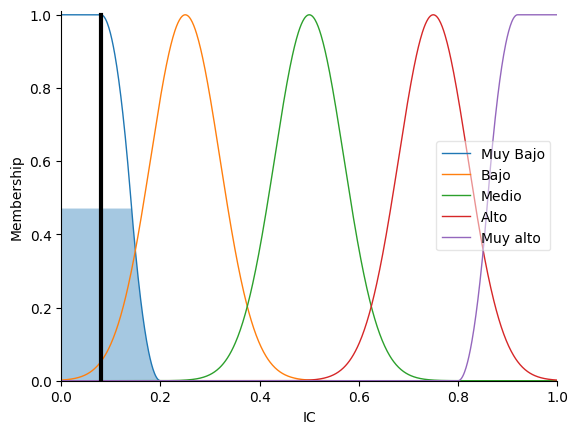

In [ ]:
import warnings
warnings.simplefilter("ignore")


Walkability_Index_simulation.input['DP'] = 5
Walkability_Index_simulation.input['DI'] = 1
Walkability_Index_simulation.input['US'] = 2
Walkability_Index_simulation.input['S'] = 2
Walkability_Index_simulation.input['V'] = 1
Walkability_Index_simulation.input['P'] = 3
Walkability_Index_simulation.input['SÑ']= 2
Walkability_Index_simulation.input['D'] = 1
Walkability_Index_simulation.input['A'] = 5


Walkability_Index_simulation.compute()

print("El índice de caminabilidad es:", np.around(Walkability_Index_simulation.output['IC'], 6))
IC.view(sim=Walkability_Index_simulation)